# Support Vector Regression (SVR)

## Importing the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [23]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y= y.reshape(len(y), 1) # As the feature scaling class requires a vertical array

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)
# Separate scaling for dependent & independent variable, since the mean & median will be different for both the datasets

## Training the SVR model on the whole dataset

In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting a new result

In [26]:
# It is required to do inverse transformation before getting the predicted value
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

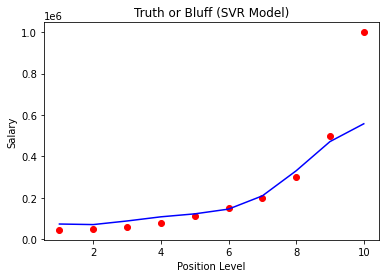

In [28]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red') # Actual Dataset 
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue') # Predicted Dataset
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

## Visualising the SVR results (for higher resolution and smoother curve)

Text(0, 0.5, 'Salary')

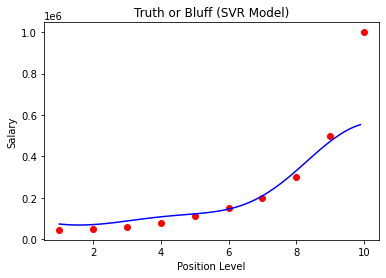

In [35]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red') # Actual Dataset 
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='blue') # Predicted Dataset
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')